# 简单线性回归

- 最小二乘法

- 实现简单的线性回归算法

- 使用面向对象编程实现

- 向量化运算

- 线性回归算法的评价

- 最好的衡量线性回归算法的指标



>思想简单，是许多强大的非线性模型的基础，具有很好的可解释性。背后有强大的数学理论支持。

>其本质：寻找一条直线，最大程度地去拟合样本特征和样本输出标记之间的关系



## 实现简单的线性回归算法

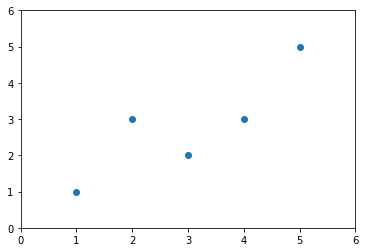

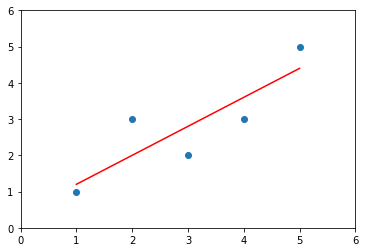

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

plt.scatter(x, y)
plt.axis([0, 6, 0, 6])
plt.show()

x_mean = np.mean(x)
y_mean = np.mean(y)
up = 0
down = 0
for x_i, y_i in zip(x, y):
    up += (x_i - x_mean) * (y_i - x_mean)
    down += (x_i - x_mean) ** 2
a = up / down
b = y_mean - a * x_mean

y_hat = a * x + b
plt.scatter(x, y)
plt.plot(x, y_hat, 'r')
plt.axis([0, 6, 0, 6])
plt.show()
# 接下来测试一个新的数据
x_new = 6
y_predict = a * x_new + b

## 使用面向对象编程实现


In [5]:
import numpy as np

class SimpleLinearRegreesion1(object):
    def __init__(self):
        self.a_ = None
        self.b_ = None
        
    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, "Simple linear regression can only solve single feature training data"
        assert len(x_train) == len(y_train), "the size of x_train must be equal to the size of y_train"
        
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        up = 0
        down = 0
        for x_i, y_i in zip(x_train, y_train):
            up += (x_i - x_mean) * (y_i - x_mean)
            down += (x_i - x_mean) ** 2
        
        self.a_ = up / down
        self.b_ = y_mean - self.a_ * x_mean
        
        return self
    
    def predict(self, x_predict):
        assert x_predict.ndim == 1, "Simple linear regression can only solve single feature training data"
        assert self.a_ is not None and self.b_ is not None, "must fit before predict!"
        "这个函数用来处理一次传入多个x_predict"
        return [self._predict(x) for x in x_predict]
    
    def _predict(self, x_single):
        "预测单个数据"
        return self.a_ * x_single + self.b_
    
    def __repr__(self):
        return "SimpleLinearRegression"
    
if __name__ == '__main__':
    import numpy as np

    x = np.array([1., 2., 3., 4., 5.])
    y = np.array([1., 3., 2., 3., 5.])
    x_new = 6

    reg1 = SimpleLinearRegreesion1()
    reg1.fit(x, y)
    y_predict = reg1.predict(np.array([x_new]))
    print(y_predict)
    print(reg1.a_)
    print(reg1.b_)

[5.2]
0.8
0.39999999999999947


## 向量化运算
import numpy as np

In [6]:
class SimpleLinearRegreesion2(object):

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, "Simple linear regression can only solve single feature training data"
        assert len(x_train) == len(y_train), "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        up = (x_train - x_mean).dot(y_train - y_mean)
        down = (x_train - x_mean).dot((x_train - x_mean))

        self.a_ = up / down
        self.b_ = y_mean - self.a_ * x_mean
        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, "Simple linear regression can only solve single feature training data"
        assert self.a_ is not None and self.b_ is not None, "must fit before predict!"
        "这个函数用来处理一次传入多个x_predict"
        return [self._predict(x) for x in x_predict]

    def _predict(self, x_single):
        "预测单个数据"
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression"
    

性能对比

In [7]:
if __name__ == '__main__':
    import numpy as np
    import time

    m = 100000
    x = np.random.random(size=m)
    y = x * 2.0 + 3.0 + np.random.normal(0, 1, size=m)

    start1 = time.time()
    reg1 = SimpleLinearRegreesion1()
    reg1.fit(x, y)
    stop1 = time.time()
    print("运行时间:%s" % (stop1 - start1))

    start2 = time.time()
    reg2 = SimpleLinearRegreesion2()
    reg2.fit(x, y)
    stop2 = time.time()
    print("运行时间:%s" % (stop2 - start2))
    

运行时间:0.09574460983276367
运行时间:0.00498652458190918


## 线性回归算法的评价

![a](img/one.png)

#### 使用波士顿房价做简单线性回归，并使用这面三中评价函数对线性回归模型进行评价

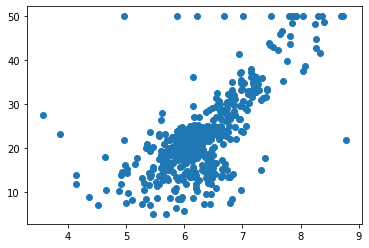

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()

boston.feature_names
x = boston.data[:, 5]   # 只是用房间数量这个特征
y = boston.target       # 波士顿房价
plt.scatter(x, y)
plt.show()